# Explore here

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import math

url = "https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv"

total_data = pd.read_csv(url)  

total_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [2]:
import utils as eda

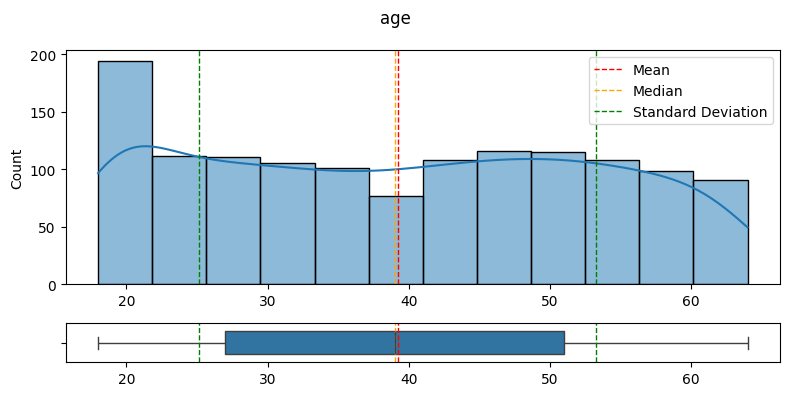

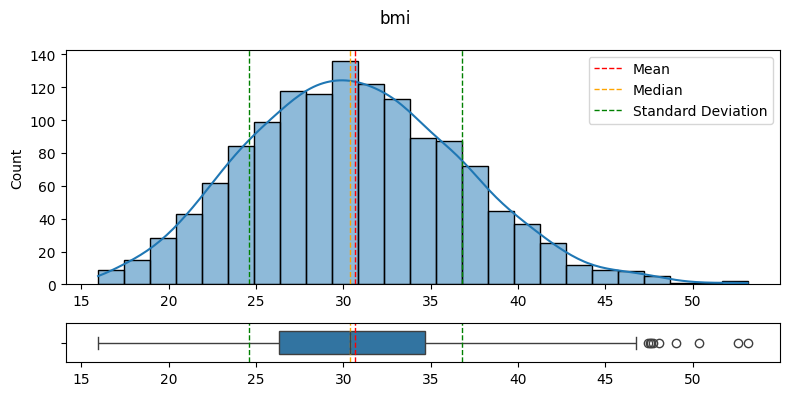

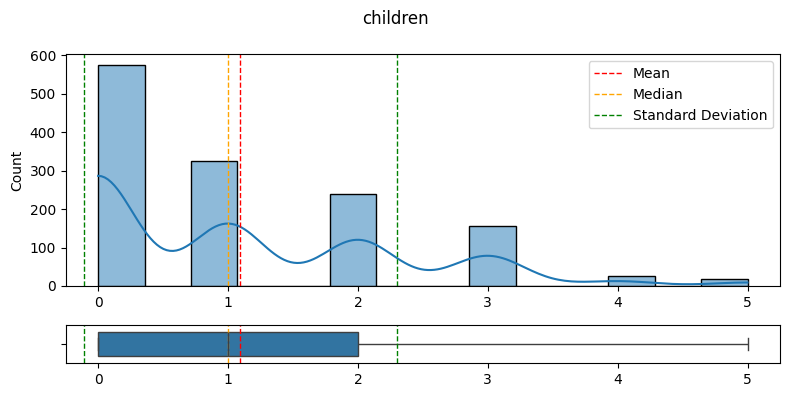

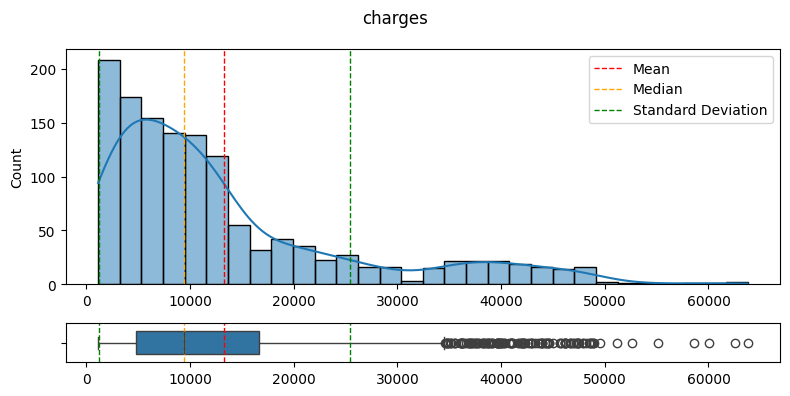

In [3]:
eda.plot_numerical_data(total_data) 

Analisis de resultados: 
1. age:
Probablemente verás que la distribución está sesgada hacia edades jóvenes o adultas jóvenes, con una mediana y media cercanas. La desviación estándar indicara la dispersion de edades. El boxplot puede mostrar si hay valores atípicos.

2. Índice de masa corporal (bmi):
Se puede observar la distribución es simétrica, hay valores extremos (muy bajos o muy altos de 30 ). El boxplot mostrará la dispersión y posibles outliers.

3. children:
Al ser una variable discreta, el histograma mostrará la frecuencia de cada número de hijos. La media y mediana darán una idea del número típico de hijos. El boxplot puede mostrar si hay familias con muchos hijos (outliers).

4. charges:
Esta variable parece muy sesgada, con muchos valores bajos y algunos muy altos. La diferencia entre media y mediana puede ser grande, indicando asimetría. El boxplot muestra
 los valores extremos.

In [5]:
eda.plot_categorical_data(total_data)

AttributeError: module 'utils' has no attribute 'plot_categorical_data'